Uppdrag 1

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px 
from Functions.bar_color import bar_colour
from Functions.load_data import load_data
from config import file_path

# reads all sheets into a sictionary of DataFrames
# got information on https://www.geeksforgeeks.org/how-to-read-excel-multiple-sheets-in-python-pandas/
# skipped all NAN rows with setting the header to 8
df_sheets = load_data(file_path)
sheets = ['Engelska', 'Matematik', 'Svenska', 'Svenska som andraspråk']

In [21]:
# rename all the columns
df_sheets = {
    sheet: df.rename(columns={
        'Riket': 'Plats',
        'Typ av huvudman': 'Huvudman',
        'Totalt': 'Totalt (A-F)',
        'Flickor': 'Flickor (A-F)',
        'Pojkar': 'Pojkar (A-F)',
        'Totalt ': 'Totalt (A-E)',
        'Flickor ': 'Flickor (A-E)',
        'Pojkar ': 'Pojkar (A-E)',
        'Totalt  ': 'Totalt (Poäng)',
        'Flickor  ': 'Flickor (Poäng)',
        'Pojkar  ': 'Pojkar (Poäng)'
    }) for sheet, df in df_sheets.items()
}

# Kontrollera info för Engelska
df_sheets["Engelska"].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Plats            4 non-null      object 
 1   Huvudman         4 non-null      object 
 2   Totalt (A-F)     4 non-null      int64  
 3   Flickor (A-F)    4 non-null      int64  
 4   Pojkar (A-F)     4 non-null      int64  
 5   Totalt (A-E)     4 non-null      float64
 6   Flickor (A-E)    4 non-null      float64
 7   Pojkar (A-E)     4 non-null      float64
 8   Totalt (Poäng)   4 non-null      float64
 9   Flickor (Poäng)  4 non-null      float64
 10  Pojkar (Poäng)   4 non-null      float64
dtypes: float64(6), int64(3), object(2)
memory usage: 484.0+ bytes


In [22]:
# since "Svenska som andraspråk" only contains two ".." need to convert to NaN
# with replace, then fill the column with 0 so it will look better in the chart
df_sheets["Svenska som andraspråk"]["Totalt (Poäng)"] = df_sheets["Svenska som andraspråk"]["Totalt (Poäng)"].replace("..", np.nan)
df_sheets["Svenska som andraspråk"]["Totalt (Poäng)"] = df_sheets["Svenska som andraspråk"]["Totalt (Poäng)"].fillna(0)

C:\Users\elvir\AppData\Local\Temp\ipykernel_12564\3105433648.py:3: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



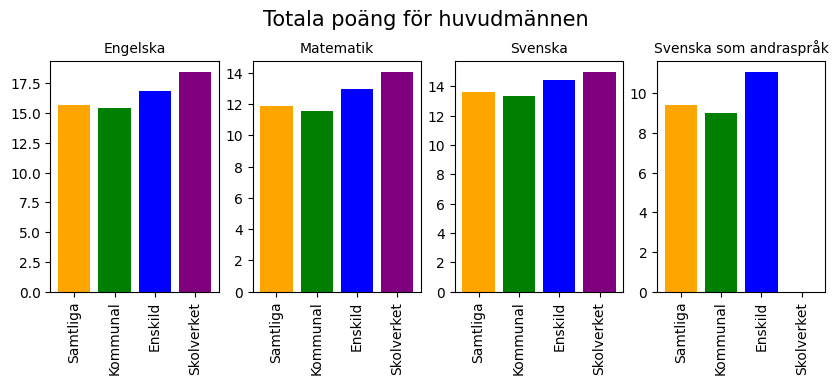

In [23]:
# plot the barchart, need to use subplots 
# categorys = the different subjects for the total points in the total subjects
# english, swedish, maths and swedish as second language
fig, axs = plt.subplots(1, 4, figsize=(10, 3))

subjects = [
    ("Engelska", "Engelska"),
    ("Matematik", "Matematik"),
    ("Svenska", "Svenska"),
    ("Svenska som andraspråk", "Svenska som andraspråk")
]

fig.suptitle("Totala poäng för huvudmännen", fontsize=15, y = 1.05)

for i, (sheet_name, title) in enumerate(subjects):
    subject_df = df_sheets[sheet_name]
    axs[i].bar(
        subject_df['Huvudman'], 
        subject_df['Totalt (Poäng)'],
        color = bar_colour(subject_df)
    )
    axs[i].set_title(title, fontsize=10)
    axs[i].set_xticks([0, 1, 2, 3])
    axs[i].tick_params(axis='x', rotation=90)

plt.savefig("Visualiseringar/Uppgift_1.png")
plt.show()


Uppgift 2

In [24]:
# read in the specific Tabell from the excel file
# lots of NaN values
from config import df_tabell_sheet
from Functions.load_data import load_tabell_data
df_tabell = load_tabell_data(df_tabell_sheet)

In [25]:
# let's rename the columns first
df_tabell.rename(columns ={
        'Unnamed: 0': 'Kategorier',
        'Totalt': 'Totalt (16 Ämnen)', 
        'Flickor': 'Flickor (16 Ämnen)', 
        'Pojkar': 'Pojkar (16 Ämnen)', 
        'Totalt.1': 'Totalt (17 Ämnen)', 
        'Flickor.1': 'Flickor (17 Ämnen)', 
        'Pojkar.1': 'Pojkar (17 Ämnen)', 
        'Totalt.2': 'Total (%)', 
        'Flickor.2': 'Flickor (%)', 
        'Pojkar.2': 'Pojkar (%)', 
    }, inplace = True)

df_tabell.head()

,Kategorier,Totalt (16 Ämnen),Flickor (16 Ämnen),Pojkar (16 Ämnen),Totalt (17 Ämnen),Flickor (17 Ämnen),Pojkar (17 Ämnen),Total (%),Flickor (%),Pojkar (%)
0,2018/19,221.7,234.3,209.8,229.8,243.3,217.0,24.5,21.7,27.2
1,2019/20,222.9,235.7,210.9,231.1,244.9,218.2,23.9,21.4,26.3
2,2020/21,223.9,235.4,212.9,232.1,244.4,220.3,23.9,21.9,25.9
3,2021/22,221.2,231.6,211.4,229.2,240.3,218.8,25.9,24.2,27.5
4,2022/23,220.6,229.7,211.9,228.5,238.2,219.3,26.8,25.5,28.0


In [26]:
# filter out the years from the Kategori tabell
# I use the isin() method to choose the rows based on multiple values
# got info on https://www.w3schools.com/python/pandas/ref_df_isin.asp
df_years_filtered = df_tabell.loc[df_tabell['Kategorier'].isin(['2018/19', '2019/20', '2020/21',
       '2021/22', '2022/23'])]

In [27]:
# plotly line diagram for students with no passing grade
# found info on https://plotly.com/python/plotly-express/
fig = px.line(df_years_filtered , 
            x = "Kategorier", 
            y = ["Total (%)", "Flickor (%)", "Pojkar (%)"], 
            title = "Andel elever som saknar godkänt betyg",
            labels = {"value": "Andel (%)", "variable": "Kategorier", "Kategorier": "Läsår"}, 
            line_shape="spline", render_mode="svg", 
            markers = True)

fig.write_html("Visualiseringar/Uppgift_2a.html")
fig.show() 

In [28]:
# plotly diagram for meritvärde för 16 ämnen, for pojkar, flickor och totalt
fig = px.line(df_years_filtered , x = "Kategorier", y = ["Totalt (16 Ämnen)", "Flickor (16 Ämnen)", "Pojkar (16 Ämnen)"], 
title = "Meritvärde för 16 ämnen",
labels = {"value": "Meritvärde", "variable": "Kategorier", "Kategorier": "Läsår",}, 
line_shape="spline", 
render_mode="svg",
markers = True)

fig.write_html("Visualiseringar/Uppgift_2b.html")
fig.show()

Bonus

1. Andel elever utan godkänt betyg – Kommunal vs Enskild huvudman

Diagrammet visar tydligt att andelen elever utan godkänt betyg är högre hos elever i kommunala skolor jämfört med enskilda skolor.

**Insikter:**
- Enskilda huvudmän har lägre andel elever utan godkänt betyg.
- Pojkar är överrepresenterade bland elever utan godkänt betyg.

In [36]:
df_huvudman_data = df_tabell[df_tabell['Kategorier'].isin(['Kommun', 'Enskild'])]

# bar chart for the Huvudman
fig = px.bar(df_huvudman_data, 
            x = "Kategorier", 
            y=["Total (%)", "Flickor (%)", "Pojkar (%)"], 
            title="Andel elever som saknar godkänt betyg",
            labels={"value": "Andel %", "variable": "Kategorier", "Kategorier": "Huvudman"},
            barmode = 'group')

fig.write_html("Visualiseringar/Uppgift_2c_1.html")
fig.show()

2. Meritvärde – Elever med svensk vs utländsk bakgrund

Det här diagrammet visar att elever med svensk bakgrund generellt har högre meritvärden än elever med utländsk bakgrund.

**Insikter:**
- Elever med svensk bakgrund presterar högre i snitt.
- Könsskillnader finns inom båda grupper, men gapet mellan bakgrund är större.

In [ ]:
df_background_data = df_tabell[df_tabell['Kategorier'].isin(['Elever med svensk bakgrund', 'Elever med utländsk bakgrund'])]

 # a bar chart for students backgrounds
fig = px.bar(df_background_data, 
x = "Kategorier", 
y = ["Totalt (17 Ämnen)", "Flickor (17 Ämnen)", "Pojkar (17 Ämnen)"], 
title = "Meritvärde för 17 ämnen baserat på elevers bakgrund",
labels = {"value": "Meritvärde", "variable": "Kategorier", "Kategorier": ""}, 
barmode = 'group')

fig.write_html("Visualiseringar/Uppgift_2c_2.html")
fig.show()

3. Meritvärde – Föräldrarnas utbildningsnivå

Här ser vi ett tydligt samband mellan föräldrarnas utbildning och elevens meritvärde. Ju högre utbildning föräldrarna har, desto högre är meritvärdet för både flickor och pojkar.

**Insikter:**
- Stark korrelation mellan förälders utbildningsnivå och elevens prestation.
- Flickor har genomgående högre meritvärden än pojkar.

In [ ]:
df_parents_data = df_tabell[df_tabell['Kategorier'].isin(['Förgymnasial utbildning', 'Gymnasial utbildning', 'Eftergymnasial utbildning'])]

# a bar char on the parents education
fig = px.bar(df_parents_data,
x = "Kategorier", 
y = ["Totalt (16 Ämnen)", "Flickor (16 Ämnen)", "Pojkar (16 Ämnen)"], 
title = "Meritvärde för 16 ämnen baserat på föräldrarnas utbildning",
labels = {"value": "Meritvärde", "variable": "Kategorier", "Kategorier": "Utbildning"}, 
barmode = 'group')

fig.write_html("Visualiseringar/Uppgift_2c_3.html")
fig.show()